In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 학습셋, 테스트셋 가져오기
(X_train, Y_train), (X_test, Y_test) =\
    keras.datasets.imdb.load_data(num_words=5000)

In [3]:
# 데이터 관찰하기
print(X_train.shape, Y_train.shape)
print("\n",X_train[0], len(X_train[0]), len(X_train[1]))
print("\n",Y_train.shape, Y_train[0])

(25000,) (25000,)

 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32] 218 189

 (25000,) 1


In [4]:
# x_test 데이터를 50%는 valid_data로 50% 는 test_data 로
from sklearn.model_selection import train_test_split

In [5]:
# x_test 데이터를 50%는 valid_data로 50% 는 test_data 로
x_val, x_test, y_val, y_test = train_test_split(X_test, Y_test, 
                                                    test_size=0.5)

In [12]:
# 데이터 전처리 : 각 문장의 단어수를 100개로 패딩
x_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=100)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=100)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=100)

In [33]:
# 모델 설정 : 임베딩, 드롭아웃(50%), 컨볼루션(64, 커널 :3, strides=1)
#   맥스풀링( size 2 ), LSTM(60), sigmoid
model= keras.models.Sequential()
model.add(keras.layers.Embedding(5000, 100))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64, 3, padding='valid', activation='relu'))
model.add(keras.layers.MaxPooling1D(2))
model.add(keras.layers.LSTM(60))   # GRU(60)
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics='accuracy')
# model.summary()

In [34]:
# 콜백 설정
checkpoint = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=3,
                                            restore_best_weights=True)

# 모델 실행
history = model.fit(x_train, Y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stopping])

Epoch 1/100
391/391 [==============================] - 16s 37ms/step - loss: 0.4646 - accuracy: 0.7611 - val_loss: 0.3427 - val_accuracy: 0.8514
Epoch 2/100
391/391 [==============================] - 15s 37ms/step - loss: 0.3022 - accuracy: 0.8762 - val_loss: 0.3332 - val_accuracy: 0.8543
Epoch 3/100
391/391 [==============================] - 16s 40ms/step - loss: 0.2633 - accuracy: 0.8944 - val_loss: 0.3378 - val_accuracy: 0.8538
Epoch 4/100
391/391 [==============================] - 16s 41ms/step - loss: 0.2238 - accuracy: 0.9139 - val_loss: 0.3549 - val_accuracy: 0.8552
Epoch 5/100
391/391 [==============================] - 16s 41ms/step - loss: 0.1967 - accuracy: 0.9251 - val_loss: 0.3549 - val_accuracy: 0.8553


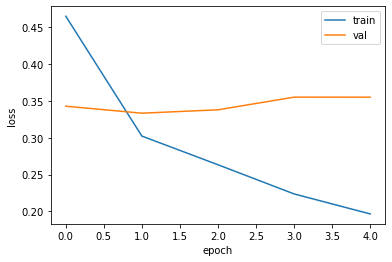

391/391 [==============================] - 2s 6ms/step - loss: 0.3348 - accuracy: 0.8538

 테스트 결과 : 0.3348 


In [35]:
# 모델 학습과 검증의 손실율 그래프로 표현
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 테스트 데이터를 모델에 적용한 결과 출력
print("\n 테스트 결과 : %.4f " % (model.evaluate(x_test, y_test)[0]))

In [26]:
# LSTM 2개층 연결
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(5000, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [27]:
# 모델 컴파일
model2.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics='accuracy')

# 콜백 설정
checkpoint = keras.callbacks.ModelCheckpoint('best-2lstm-model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=3,
                                            restore_best_weights=True)

# 모델 실행
history = model2.fit(x_train, Y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stopping])

Epoch 1/100
391/391 [==============================] - 24s 55ms/step - loss: 0.4971 - accuracy: 0.7496 - val_loss: 0.3751 - val_accuracy: 0.8396
Epoch 2/100
391/391 [==============================] - 19s 49ms/step - loss: 0.3258 - accuracy: 0.8662 - val_loss: 0.3485 - val_accuracy: 0.8475
Epoch 3/100
391/391 [==============================] - 19s 48ms/step - loss: 0.2842 - accuracy: 0.8852 - val_loss: 0.3591 - val_accuracy: 0.8473
Epoch 4/100
391/391 [==============================] - 19s 49ms/step - loss: 0.2598 - accuracy: 0.8976 - val_loss: 0.3572 - val_accuracy: 0.8466
Epoch 5/100
391/391 [==============================] - 19s 49ms/step - loss: 0.2375 - accuracy: 0.9070 - val_loss: 0.3763 - val_accuracy: 0.8441


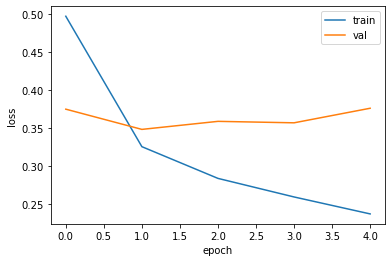

In [28]:
# 모델 학습과 검증의 손실율 그래프로 표현
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [29]:
#  GRU : LSTM 간소화 버전
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(5000, 16, input_length=100))
model3.add(keras.layers.GRU(8))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [30]:
# 모델 컴파일
model3.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics='accuracy')

# 콜백 설정
checkpoint = keras.callbacks.ModelCheckpoint('best-3lstm-model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=3,
                                            restore_best_weights=True)

# 모델 실행
history = model3.fit(x_train, Y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stopping])

Epoch 1/100
391/391 [==============================] - 14s 32ms/step - loss: 0.5338 - accuracy: 0.7120 - val_loss: 0.3816 - val_accuracy: 0.8312
Epoch 2/100
391/391 [==============================] - 11s 29ms/step - loss: 0.3328 - accuracy: 0.8609 - val_loss: 0.3608 - val_accuracy: 0.8441
Epoch 3/100
391/391 [==============================] - 11s 29ms/step - loss: 0.2873 - accuracy: 0.8862 - val_loss: 0.3708 - val_accuracy: 0.8381
Epoch 4/100
391/391 [==============================] - 11s 29ms/step - loss: 0.2673 - accuracy: 0.8961 - val_loss: 0.3893 - val_accuracy: 0.8313
Epoch 5/100
391/391 [==============================] - 11s 29ms/step - loss: 0.2506 - accuracy: 0.9035 - val_loss: 0.4002 - val_accuracy: 0.8360


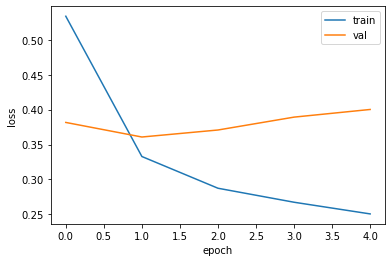

In [31]:
# 모델 학습과 검증의 손실율 그래프로 표현
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()